# Gathering Data

- downloaded the “twitter_archive_enhanced.csv” file manually which was provided by Udacity, then I uploaded this file manually to my online workspace
- downloaded programmatically “image_predictions.tsv” file, which was hosted on Udacity's servers, then I saved it programmatically in the main directory



Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive
query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. 

Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [3]:
import pandas as pd
import requests
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

download "image-predictions.tsv" programmatically and calling "twitter_archive_enhanced.csv"

In [4]:
# reading "twitter_archive_enhanced.csv"
df_1 = pd.read_csv("twitter-archive-enhanced.csv")

# download "image-predictions.tsv" programmatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
img_prediction = requests.get(url)
name = url.split("/")[-1]
with open(name,"wb") as image_predictions:
    image_predictions.write(img_prediction.content)
df_2 = pd.read_csv(name, sep="\t")


getting from tweeter's API: each tweet's retweet count and favorite ("like") count

In [3]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [25]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values

In [4]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
i=0
failed = []
with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        i += 1
        try:
            status = api.get_status(tweet_id, tweet_mode="extended")
            print(i,": Sucess")
            json.dump(status,file)
            file.write('\n')
        except tweepy.TweepError as error:
            print(i,": Fail")
            failed[tweet_id] = error
            pass

In [5]:
# read .txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.
df={"tweet_id":[],"retweet_count":[],"favorite_count":[]}
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        df["tweet_id"].append(tweet["id"])
        df["retweet_count"].append(tweet["retweet_count"])
        df["favorite_count"].append(tweet["favorite_count"])
df_3 = pd.DataFrame(data=df)

# Assessing Data

- Detect and document at least eight (8) quality issues and two (2) tidiness issues:-

## Quality issues

### in df_1:

- "expanded_urls" column has alot of missing values
- "doggo", "floofer", "pupper", "puppo" columns have alot of missing values
- "name" column has alot of missing values or wrong ones such as: "None" or "a" or "one" "Bo" or "an" or "by" or "my" or "the" or "just" while "Al" and "O" should be done manually

- a lot of tweets with no images url
- "retweeted_status_id", "retweeted_status_user_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_timestamp" columns are present on this data although they shouldn't and any row that contains data in those columns shouldn't be in the table as well

- "tweet_id" should be string 
- "retweeted_status_timestamp" should be datetype not string
- "source" written as HTML while it should contain the name of the device which was the source of the tweet only


### in df_2:

- "tweet_id" should be string

### in df_3:

- a lot of tweets with no images
- "tweet_id" should be string

## tidiness issues

- "doggo", "floofer", "pupper", "puppo" should be one column
- As "df_3" table shows data which is very related to the data shown in "df_1" and "df_2" table , they can be merged

In [62]:
# df_1.head()
# df_2.head()
df_3.head()

In [63]:
# df_1.tail()
# df_2.tail()
df_3.tail()

In [64]:
# sum(df_1.duplicated())
# sum(df_2.duplicated())
sum(df_3.duplicated())

In [65]:
# df_1.info()
# df_2.info()
df_3.info()

In [ ]:
# df_1["name"].value_counts()
# df_1["doggo"].value_counts()
df_1["retweeted_status_timestamp"].value_counts(dropna=False)

In [ ]:
# df_1.describe()
df_2.describe()

In [ ]:
hi2["retweeted_status_timestamp"].value_counts(dropna=False)

In [788]:
cleaned_df["tweet_id"].iloc[32]

'885167619883638784'

In [1196]:
cleaned_df.iloc[159,3]

'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

# Cleaning Data

Clean each of the issues you documented while assessing

### in df_1:

- "expanded_urls" column has alot of missing values
- merge "doggo", "floofer", "pupper", "puppo" columns and then put missing values as NaN
- gather missing data in "name" column from the text

- remove "retweeted_status_id", "retweeted_status_user_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_timestamp" columns as well as any row that contain data in those columns
- a lot of tweets with no images url

- convert "tweet_id" data typed to string
- convert "retweeted_status_timestamp" to datetype
- gather the right data from "source" column and replace the old data with the new ones

### in df_2:

- convert "tweet_id" data typed to string

### in df_3:

- a lot of tweets with no images url
- convert "tweet_id" data typed to string

## tidiness issues

- merge "doggo", "floofer", "pupper", "puppo" columns
- merge "df_3", "df_1" and "df_2" tables

In [6]:
# quality issue:  "doggo", "floofer", "pupper", "puppo" replace "None" values with ""
clean_df1 = df_1.copy()
clean_df1.loc[:,"doggo":"puppo"]=clean_df1.loc[:,"doggo":"puppo"].replace("None","")

# tidiness issue:  "doggo", "floofer", "pupper", "puppo" should be one column (tidiness)
clean_df1["dog_type"]= clean_df1["doggo"] + clean_df1["floofer"] + clean_df1["pupper"] + clean_df1["puppo"]
clean_df1.drop(columns=clean_df1.loc[:,"doggo":"puppo"],inplace=True)
clean_df1["dog_type"].replace("",np.nan,inplace=True)
clean_df1.loc[clean_df1["dog_type"].isin(["doggopupper"]),"dog_type"]='doggo-pupper'
clean_df1.loc[clean_df1["dog_type"].isin(["doggofloofer"]),"dog_type"]='doggo-floofer'
clean_df1.loc[clean_df1["dog_type"].isin(["doggopuppo"]),"dog_type"]='doggo-puppo'

In [7]:
# tidiness issue:  merge "df_1", "df_2" and "df_3" should be one table (tidiness)
merged_df1 = pd.merge(clean_df1, df_3, on='tweet_id')
merged_df1 = pd.merge(merged_df1, df_2, on='tweet_id')

In [8]:
# quality issue:  "retweeted_status_id", "retweeted_status_user_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_timestamp" rows should be removed
# quality issue:  "expanded_urls" have a lot of missing values should be solved here automatically
# quality issue:  a lot of "tweet_id" with no images should be solved here automatically
drop = ["retweeted_status_id", "retweeted_status_user_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_timestamp"]
cleaned_df = merged_df1.drop(index=merged_df1.query("retweeted_status_id==retweeted_status_id").index)
cleaned_df = cleaned_df.drop(index=cleaned_df.query("in_reply_to_status_id==in_reply_to_status_id").index)
cleaned_df.reset_index(inplace=True)

# quality issue:  "retweeted_status_id", "retweeted_status_user_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_timestamp" columns should be removed
cleaned_df.drop(columns=cleaned_df.loc[:,drop],inplace=True)

In [9]:
# quality issue:  "tweet_id" should be string
for i in range(len(cleaned_df)):
    cleaned_df["tweet_id"] = cleaned_df["tweet_id"].apply(str)

# quality issue:  "retweeted_status_timestamp" should be datetime not string
cleaned_df["timestamp"] = pd.to_datetime(cleaned_df["timestamp"])

In [10]:
# quality issue:  "name" column has wrong values such as "None", "a", "one", "an", "by", "my", "the"and "just", while "Al", "O" should be done manually (as they are special names)

# find any name with formula "name is","named ","this is ", "meet " and "called "
pattern = re.compile(r"(?:(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+))|(?:(?:called)\s{1}([A-Za-z]+))|(?:(?:this is)\s{1}([A-Za-z]+))|(?:(?:meet)\s{1}([A-Za-z]+))",re.IGNORECASE)
bad = ["None", "a", "one", "an", "by", "my", "the", "just", "dog","SO", "of"]
index_name =[]
for i in range(len(cleaned_df)):
    try:
        if cleaned_df.loc[i,"name"] in bad:
            name = ''.join(re.findall(pattern, cleaned_df.loc[i,"text"])[0])
            if name in bad:
                name = ''.join(re.findall(pattern, cleaned_df.loc[i,"text"])[1])
                if name in bad:
                    cleaned_df.loc[i,'name'] = np.nan
                else:
                    cleaned_df.loc[i,'name'] = name
            elif name == "getting":
                cleaned_df.loc[i,'name'] = "Galapagos"
            elif name == "Al":
                cleaned_df.loc[i,'name'] = "Al Cabone"
            elif name == "O":
                cleaned_df.loc[i,'name'] = "O'Malley"
            else:
                cleaned_df.loc[i,"name"] = name

    except:
        cleaned_df.loc[i,'name'] = np.nan

In [11]:
# quality issue:  "source" column written as HTML while it should contain a word only (eg. iphone, web ...etc)
pattern = re.compile(r"(?:(?:Twitter )(?:for )?([A-Za-z]+))",re.IGNORECASE)
for i in range(len(cleaned_df)):
    try:
        source = ''.join(re.findall(pattern, cleaned_df.loc[i,"source"])[0])
        cleaned_df.loc[i,'source'] = source
    except:
        cleaned_df.loc[i,'source'] = np.nan

# Storing, Analyzing and Visualizing Data

## Storing

- Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv

## Analyzing and Visualizing Data

At least three (3) insights and one (1) visualization must be produced.

- finding top 20 most used dog names
- finding the day, month and year with highest retweet rates in the dataset
- finding average retweet and favourite counts change per month
- finding and comparing average retweet and favourite counts change per month (and visualize it)

In [12]:
# Storing the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv.
cleaned_df.to_csv("twitter_archive_master.csv")

In [13]:
# insights: finding top 20 most used dog names
cleaned_df['name'].value_counts()[:21]

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Tucker      9
Penny       9
Sadie       8
Winston     8
Lola        7
Daisy       7
Toby        7
Bella       6
Koda        6
Bo          6
Stanley     6
Jax         6
Scout       5
Leo         5
Chester     5
Zoey        5
Louis       5
Name: name, dtype: int64

In [60]:
# the day, month and year with highest retweet rates in the dataset
def highest_rate(frequency,string):
    years = cleaned_df.groupby(pd.Grouper(key="timestamp",freq=frequency)).mean()
    max_year = years["retweet_count"].values==years["retweet_count"].max()
    if string == "Day":
        year = years[max_year].index[0].day_name()
    elif string == "Month":
        year = years[max_year].index[0].month_name()
    elif string == "Year":
        year = years[max_year].index[0].year
    print("The " + string + " with the highest retweets rate: " + str(year))
    print("The retweets rates in this "+ string +": " + str(years["retweet_count"].max()))
highest_rate('1D',"Day")
highest_rate('1M',"Month")
highest_rate('1Y',"Year")

The Day with the highest retweets rate: Friday
The retweets rates in this Day: 56625.0
The Month with the highest retweets rate: August
The retweets rates in this Month: 7683.5
The Year with the highest retweets rate: 2017
The retweets rates in this Year: 6023.692090395481


In [62]:
# average retweet and favourite counts change per month
data = cleaned_df.groupby(pd.Grouper(key="timestamp",freq="1M")).mean()
months = pd.DataFrame(columns=["Nov","Dec","Jan","Feb","Mar","April","May","Jun","Jul","Aug","Seb","Oct"],
                      index=["average_retweet","average_favourite"])
i,avg_retweets,avg_favourite,j=0,0,0,0

for i in range(len(data.index)):
    if j<12:
        months.iloc[0,j] = data.iloc[i,3]
        months.iloc[1,j] = data.iloc[i,4]

        j+=1
    else:
        j=0
        months.iloc[0,j] = data.iloc[i,3]
        months.iloc[1,j] = data.iloc[i,4]
        j+=1
    i+=1
months

,Nov,Dec,Jan,Feb,Mar,April,May,Jun,Jul,Aug,Seb,Oct
average_retweet,4922.96,5400.35,6443.58,4438.03,4886.21,5844.27,7570.02,6586.09,6868.53,7683.5,3687.29,4274.28
average_favourite,14896.3,16213.8,19743.1,18737.3,20573.4,23107.3,29039.2,29126.2,31801.2,36643,11435.5,13294.2


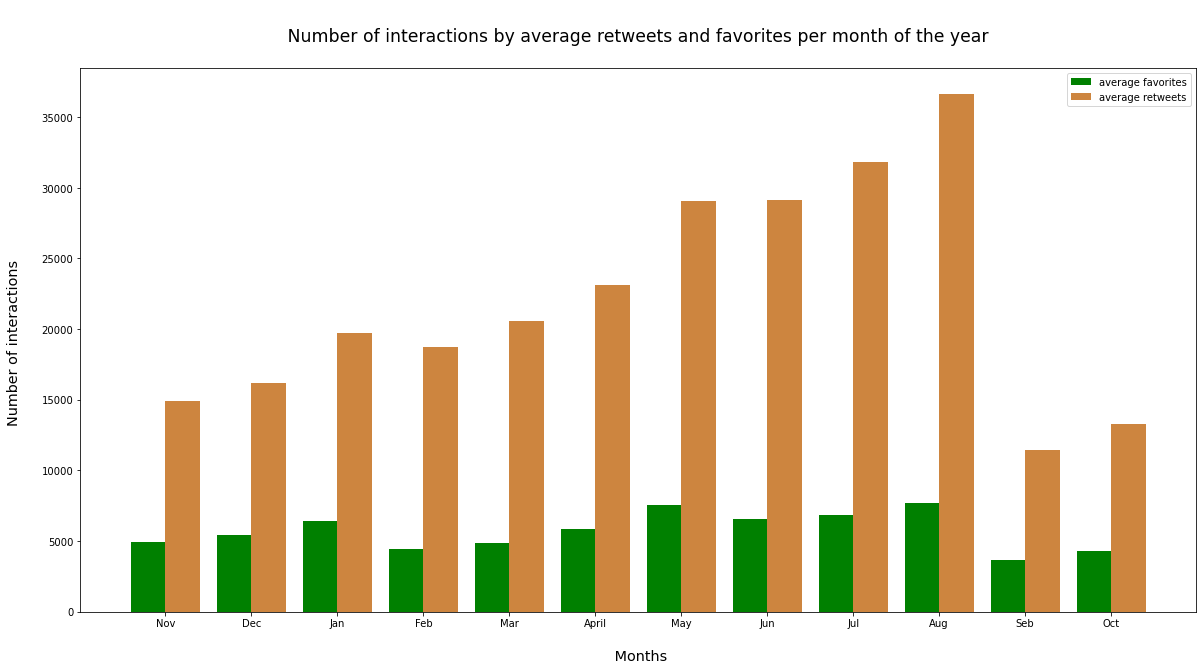

In [1222]:
# visualization: comparing average retweet and favourite counts change per month
list(months.iloc[0])
X = np.arange(0,12)
labels=["Nov","Dec","Jan","Feb","Mar","April","May","Jun","Jul","Aug","Seb","Oct"]
fig, ax = plt.subplots(figsize=(20, 10))
width = 0.4
ax.bar(X - width/2, list(months.iloc[0]), width, color = 'g', label='average favorites')
ax.bar(X + width/2, list(months.iloc[1]), width, color = '#CD853F', label='average retweets')
ax.set_xticklabels(labels)
ax.set_ylabel('Number of interactions \n',size="x-large")
ax.set_xlabel('\n Months',size="x-large")
ax.set_title('\n Number of interactions by average retweets and favorites per month of the year \n',size="xx-large")
ax.set_xticks(np.arange(len(X)))
plt.legend();